/var/folders/_k/r3pnjytj3056tzyf_rpysh7h0000gn/T/ipykernel_78419/3390842703.py:14: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


1335 1335 1335
Result:  10.498502364846768
10.498502364846768


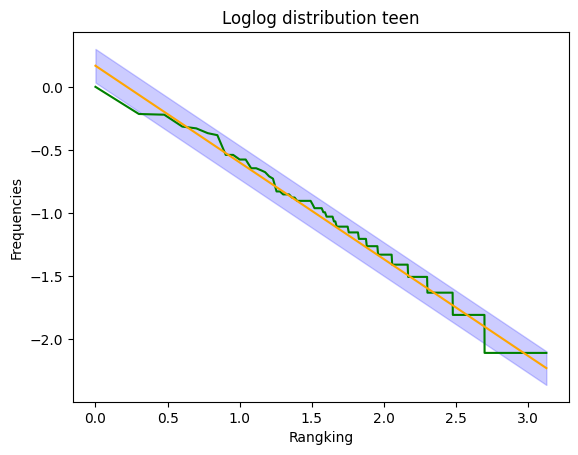

4063 4063 4063
Result:  10.283458415977595
10.283458415977595


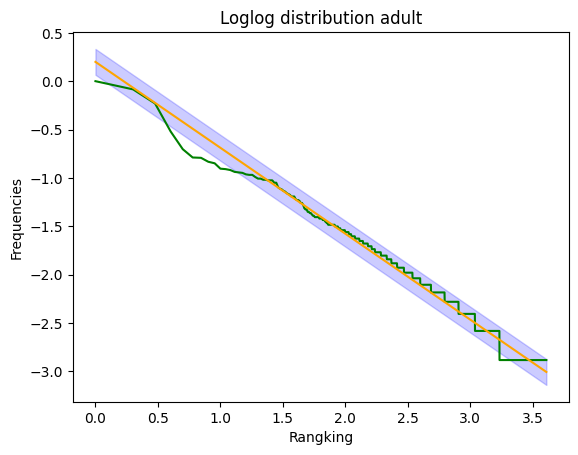

986 986 986
Result:  16.25029225621341
16.25029225621341


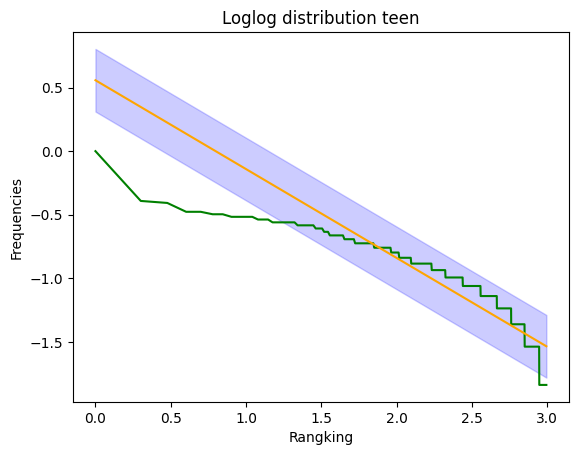

4981 4981 4981
Result:  11.78605096832603
11.78605096832603


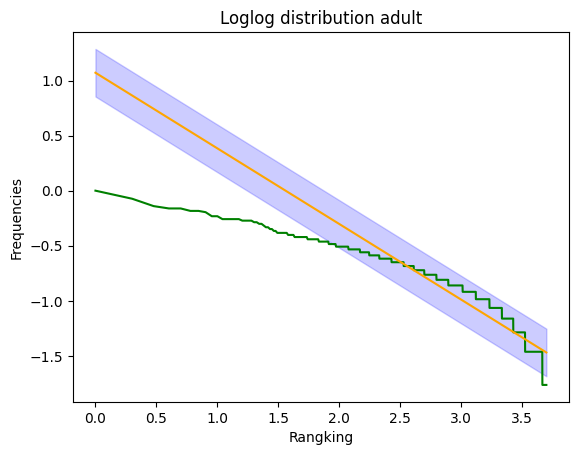

/opt/homebrew/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


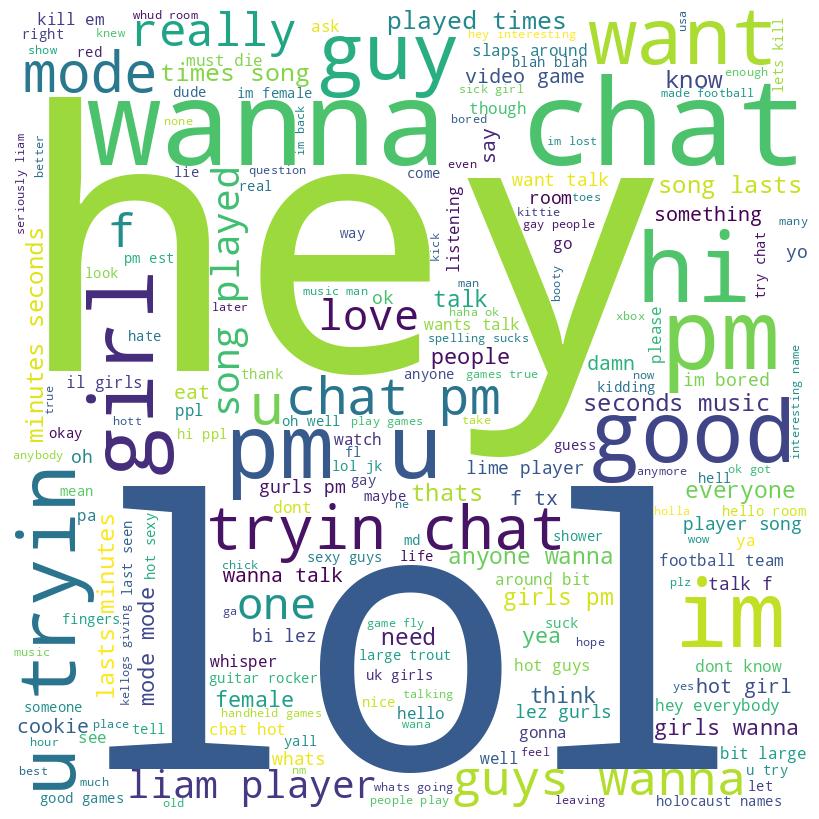

/opt/homebrew/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


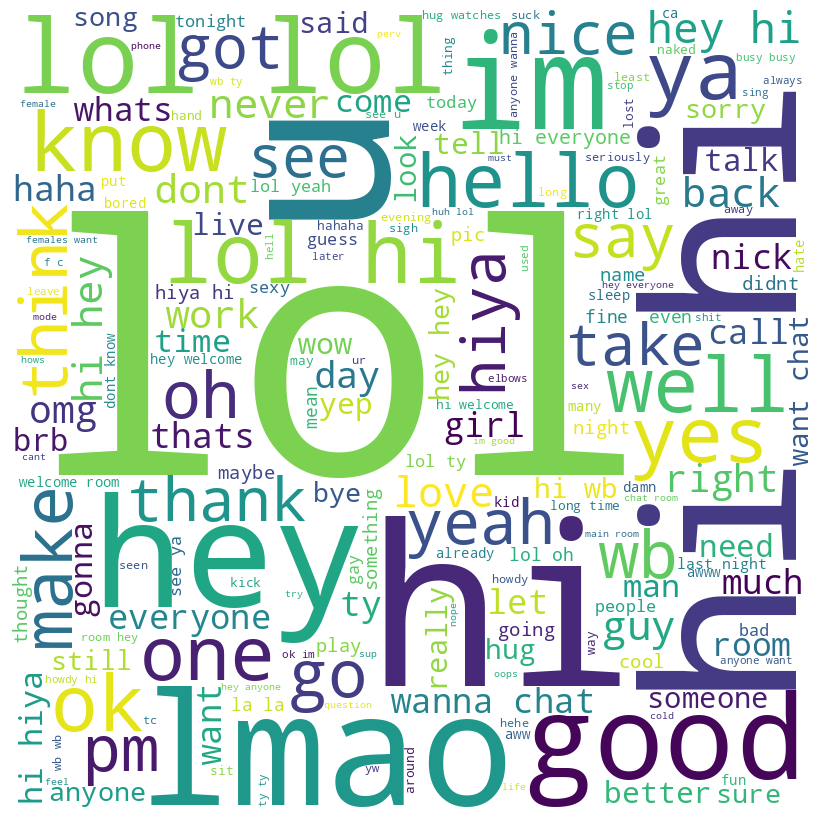

          categories                    freuency          
                self             other      self     other
0            friends  negative_emotion  0.045579  0.019890
1      communication          speaking  0.036845  0.019028
2                fun           friends  0.031114  0.018351
3            meeting     communication  0.029749  0.016319
4             listen             phone  0.028657  0.013117
5           internet            listen  0.025655  0.012932
6          messaging              home  0.025382  0.011146
7       social_media  positive_emotion  0.023745  0.010838
8           speaking          children  0.022653  0.010777
9              music           hearing  0.021834  0.009299
10  negative_emotion               fun  0.021015  0.009237
11           hearing         messaging  0.019651  0.008868
12           musical           meeting  0.018832  0.008498
13          childish             party  0.017740  0.008498
14          feminine    swearing_terms  0.016103  0.0081

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
3     -0.000371  0.0       1        1  41.255903
1     -0.000305  0.0       2        1  27.461999
4     -0.000285 -0.0       3        1  18.469009
5     -0.000009  0.0       4        1   4.563187
6      0.000006  0.0       5        1   3.128708
7      0.000031 -0.0       6        1   1.837195
2      0.000093  0.0       7        1   1.508752
0      0.000084 -0.0       8        1   1.237295
8      0.000271  0.0       9        1   0.369557
9      0.000486 -0.0      10        1   0.168396, topic_info=          Term        Freq       Total Category  logprob  loglift
2055       lol  502.000000  502.000000  Default  30.0000  30.0000
1626        hi  407.000000  407.000000  Default  29.0000  29.0000
1753         i  296.000000  296.000000  Default  28.0000  28.0000
1609       hey  157.000000  157.000000  Default  27.0000  27.0000
3676         u  106.000000  106.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
3508    thanks    0.063471   45.251383  Topic10  -7.1644  -0.1828
1651      hiya    0.083923   63.299606  Topic10  -6.8851  -0.2391
1449       got    0.066061   47.522598  Topic10  -7.1244  -0.1918
1139  everyone    0.065035   46.816367  Topic10  -7.1401  -0.1925
972       dont    0.065940   48.644104  Topic10  -7.1262  -0.2169

[658 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
8         1  0.397747   abou
8         2  0.298310   abou
8         3  0.198873   abou
23        1  0.397556  adams
23        2  0.298167  adams
...     ...       ...    ...
4057      1  0.407244     yw
4057      2  0.254527     yw
4057      3  0.203622     yw
4057      4  0.050905     yw
4057      5  0.050905     yw

[1242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 6, 7, 8, 3, 1, 9, 10])

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
3      0.000529  0.0       1        1  50.970483
7      0.000194 -0.0       2        1  14.030190
4      0.000097  0.0       3        1  11.105542
1      0.000101  0.0       4        1   9.759881
2      0.000153 -0.0       5        1   8.798485
6     -0.000045 -0.0       6        1   2.379694
8     -0.000135  0.0       7        1   1.268166
9     -0.000144  0.0       8        1   1.016428
5     -0.000218 -0.0       9        1   0.489140
0     -0.000531  0.0      10        1   0.181991, topic_info=        Term       Freq      Total Category  logprob  loglift
576        i  70.000000  70.000000  Default  30.0000  30.0000
201     chat  45.000000  45.000000  Default  29.0000  29.0000
900       pm  44.000000  44.000000  Default  28.0000  28.0000
528      hey  37.000000  37.000000  Default  27.0000  27.0000
703      lol  36.000000  36.000000  Default  26.0000  26.0000
...      ...        ...        ...      ...      ...      ...
488     haha   0.022710  14.747952  Topic10  -6.7809  -0.1671
955   really   0.023729  15.811582  Topic10  -6.7370  -0.1928
445     girl   0.023673  15.873027  Topic10  -6.7394  -0.1991
441      get   0.022664  14.810289  Topic10  -6.7829  -0.1733
1185   tryin   0.022628  14.791804  Topic10  -6.7845  -0.1737

[721 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2         1  0.542566  about
2         2  0.135641  about
2         3  0.135641  about
2         4  0.135641  about
2         5  0.135641  about
...     ...       ...    ...
1331      1  0.542651    yum
1331      2  0.135663    yum
1331      3  0.135663    yum
1331      4  0.135663    yum
1331      5  0.135663    yum

[1581 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 5, 2, 3, 7, 9, 10, 6, 1])

['i', 'chat', 'pm', 'lol', 'hey', 'wanna', 'u', 'im', 'like', 'guys']
['i', 'pm', 'chat', 'hey', 'lol', 'wanna', 'u', 'like', 'im', 'guys']
['i', 'chat', 'pm', 'hey', 'lol', 'wanna', 'u', 'like', 'im', 'girls']
['i', 'chat', 'pm', 'hey', 'lol', 'wanna', 'u', 'im', 'like', 'girls']
['i', 'pm', 'chat', 'hey', 'lol', 'wanna', 'u', 'like', 'im', 'girls']
['i', 'chat', 'pm', 'hey', 'lol', 'wanna', 'u', 'im', 'like', 'girls']
['i', 'chat', 'pm', 'hey', 'lol', 'wanna', 'u', 'like', 'im', 'guys']
['i', 'chat', 'pm', 'lol', 'hey', 'wanna', 'u', 'im', 'like', 'guys']
['i', 'chat', 'pm', 'hey', 'lol', 'wanna', 'u', 'like', 'im', 'guys']
['i', 'chat', 'pm', 'hey', 'lol', 'wanna', 'u', 'like', 'im', 'girls']


,keywords,score
0,i chat pm lol hey wanna u im like guys,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp..."
1,i pm chat hey lol wanna u like im guys,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp..."
2,i chat pm hey lol wanna u like im girls,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp..."
3,i chat pm hey lol wanna u im like girls,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp..."
4,i pm chat hey lol wanna u like im girls,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp..."
5,i chat pm hey lol wanna u im like girls,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp..."
6,i chat pm hey lol wanna u like im guys,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp..."
7,i chat pm lol hey wanna u im like guys,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp..."
8,i chat pm hey lol wanna u like im guys,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp..."
9,i chat pm hey lol wanna u like im girls,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp..."


['lol', 'hi', 'i', 'hey', 'u', 'lmao', 'like', 'im', 'good', 'ok']
['lol', 'hi', 'i', 'hey', 'u', 'lmao', 'like', 'im', 'good', 'ok']
['lol', 'hi', 'i', 'hey', 'u', 'like', 'lmao', 'im', 'good', 'wb']
['lol', 'hi', 'i', 'hey', 'u', 'like', 'lmao', 'im', 'good', 'ok']
['lol', 'hi', 'i', 'hey', 'u', 'lmao', 'like', 'im', 'good', 'ok']
['lol', 'hi', 'i', 'hey', 'u', 'lmao', 'like', 'im', 'good', 'wb']
['lol', 'hi', 'i', 'hey', 'u', 'like', 'lmao', 'im', 'good', 'ok']
['lol', 'hi', 'i', 'hey', 'u', 'like', 'lmao', 'im', 'good', 'wb']
['lol', 'hi', 'i', 'hey', 'u', 'lmao', 'like', 'im', 'good', 'wb']
['lol', 'hi', 'i', 'hey', 'u', 'like', 'lmao', 'im', 'good', 'ok']


,keywords,score
0,lol hi i hey u lmao like im good ok,"{'neg': 0.0, 'neu': 0.173, 'pos': 0.827, 'comp..."
1,lol hi i hey u lmao like im good ok,"{'neg': 0.0, 'neu': 0.173, 'pos': 0.827, 'comp..."
2,lol hi i hey u like lmao im good wb,"{'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'comp..."
3,lol hi i hey u like lmao im good ok,"{'neg': 0.0, 'neu': 0.173, 'pos': 0.827, 'comp..."
4,lol hi i hey u lmao like im good ok,"{'neg': 0.0, 'neu': 0.173, 'pos': 0.827, 'comp..."
5,lol hi i hey u lmao like im good wb,"{'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'comp..."
6,lol hi i hey u like lmao im good ok,"{'neg': 0.0, 'neu': 0.173, 'pos': 0.827, 'comp..."
7,lol hi i hey u like lmao im good wb,"{'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'comp..."
8,lol hi i hey u lmao like im good wb,"{'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'comp..."
9,lol hi i hey u like lmao im good ok,"{'neg': 0.0, 'neu': 0.173, 'pos': 0.827, 'comp..."


['i', 'chat', 'pm', 'hey', 'lol', 'wanna', 'u', 'im', 'like', 'girls']
['i', 'chat', 'pm', 'hey', 'lol', 'wanna', 'u', 'like', 'im', 'guys']
['i', 'pm', 'chat', 'hey', 'lol', 'wanna', 'u', 'im', 'like', 'guys']
['i', 'chat', 'pm', 'hey', 'lol', 'wanna', 'u', 'im', 'like', 'girls']
['i', 'chat', 'pm', 'lol', 'hey', 'wanna', 'u', 'im', 'like', 'guys']
['i', 'pm', 'chat', 'hey', 'lol', 'wanna', 'u', 'im', 'like', 'guys']
['i', 'pm', 'chat', 'hey', 'lol', 'wanna', 'u', 'like', 'im', 'guys']
['i', 'chat', 'pm', 'hey', 'lol', 'wanna', 'u', 'like', 'im', 'guys']
['i', 'chat', 'pm', 'hey', 'lol', 'u', 'wanna', 'like', 'im', 'guys']
['i', 'pm', 'chat', 'hey', 'lol', 'wanna', 'u', 'im', 'like', 'girls']
0.09999999999999998
['lol', 'hi', 'i', 'hey', 'u', 'lmao', 'like', 'im', 'good', 'wb']
['lol', 'hi', 'i', 'hey', 'u', 'lmao', 'like', 'im', 'good', 'wb']
['lol', 'hi', 'i', 'hey', 'u', 'like', 'lmao', 'im', 'good', 'ok']
['lol', 'hi', 'i', 'hey', 'u', 'lmao', 'like', 'im', 'good', 'ok']
['lol', '

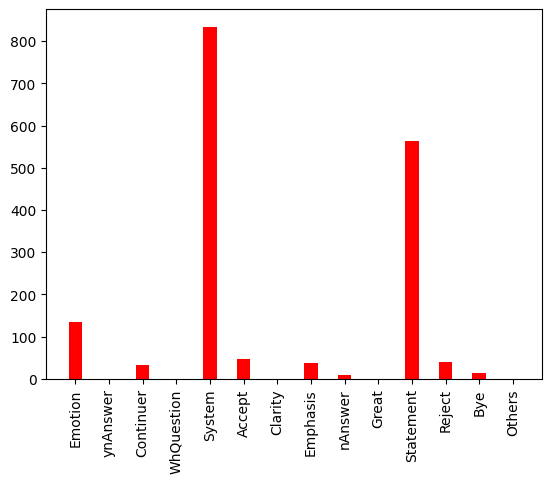

dict_values([970, 0, 134, 0, 1798, 187, 0, 152, 63, 0, 2621, 118, 182, 0])


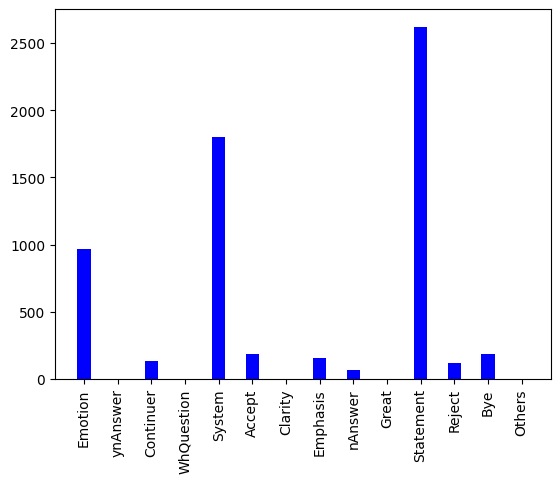

[[1410]
 [1090]
 [   0]] [[682]
 [411]
 [  0]]
dict_values([1410, 1090, 0])
dict_values([682, 411, 0])


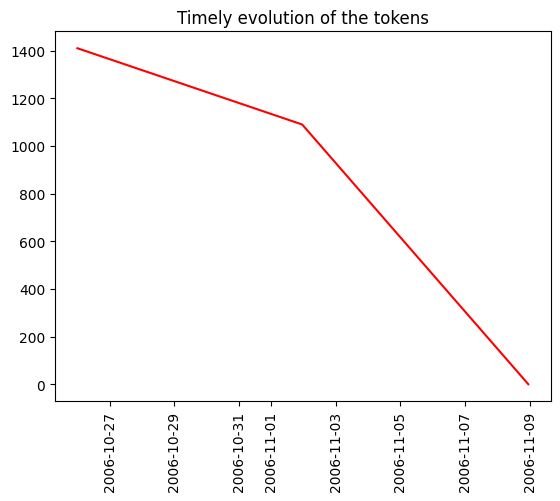

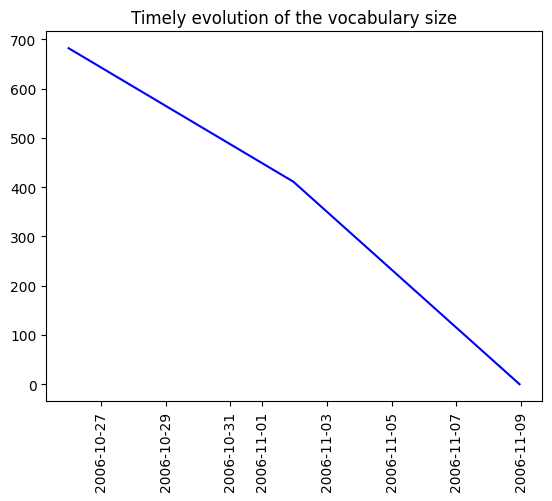

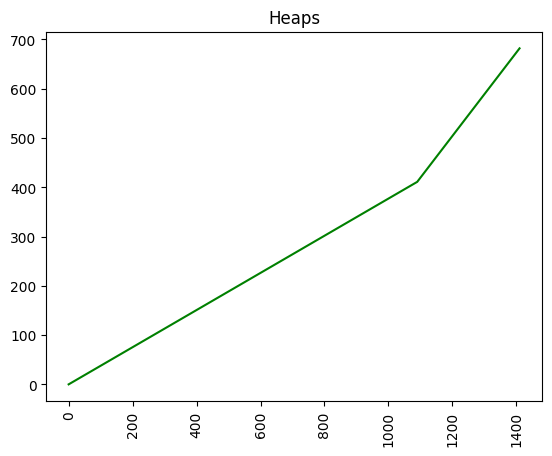

[[7036]
 [   0]
 [4988]
 [   0]] [[0]
 [0]
 [0]
 [0]]
dict_values([7036, 0, 4988, 0])
dict_values([0, 0, 0, 0])


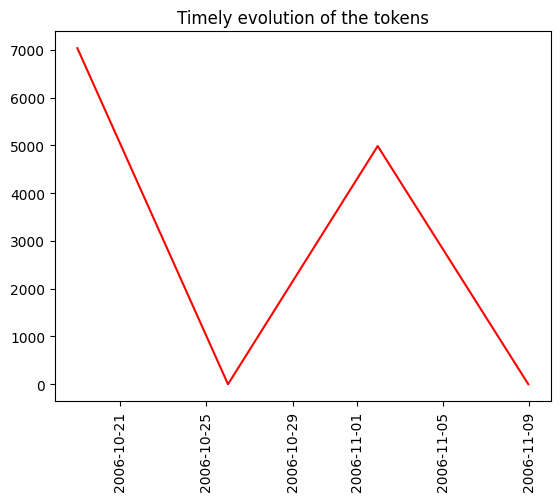

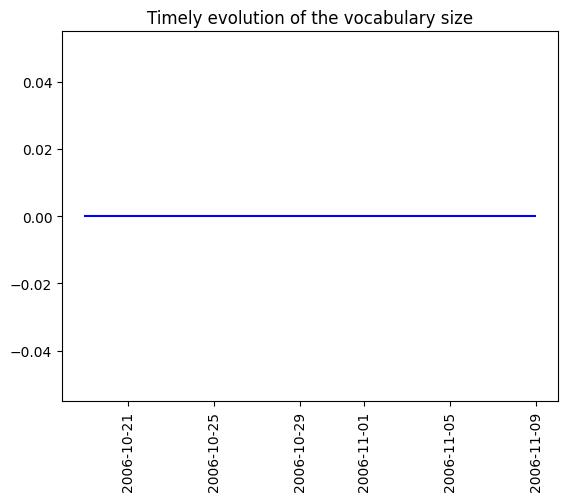

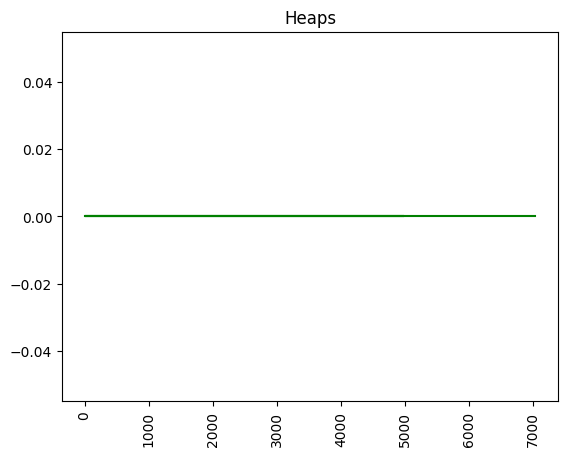

In [3]:
import nltk
from nltk.corpus import nps_chat
import re
import matplotlib.colors as mcolors
from collections import defaultdict
import matplotlib.pyplot as plt
import string
from nltk.corpus import nps_chat
from nltk.tokenize import RegexpTokenizer
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy import stats
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as pp
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import empath
import sys
import gensim.corpora as corpora
from pprint import pprint
import gensim
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


corpus_teen = {"words":[], "tagged_words":[],"tagged_sentences":[], "sentences":[],"topics":[],"dialogs":[]}
corpus_adult = {"words":[],"tagged_words":[],"tagged_sentences":[], "sentences":[],"topics":[], "dialogs":[]}

class ChatCorpora:
    tokenizer = RegexpTokenizer(r'\w+')


    #personalpronoun, Proper noun, singular, Proper noun, plural,Possessive pronoun
    pronouns = {"NNP", "PRP","NNP", "PRP$"}
    adjectives = {"ADJ"}

    def __init__(self):
       self._get_chat_data()
            
    
    def _preprocess(self,list1):
        
        flat_list = []
        if not isinstance(list1, list):
            flat_list.append(list1)
        else:
            for sublist in list1:
                if not isinstance(sublist, list):
                    flat_list.append(sublist)
                else:
                    for item in sublist:
                        flat_list.append(item)
        
        flat_list2 = [word for word in flat_list if re.match(r'[^\W\d]*$', word) and word[0] != 'JOIN' and word[0] != 'PART' and word[0] != 'ACTION' and word[0] not in stop_words ]
        return flat_list2

    

    def _get_chat_data(self):
       
        for i, p in enumerate(nps_chat.xml_posts()):
           
            if p.get("user").find("teen") != -1 :
                
                corpus_teen["tagged_sentences"].append(list((t.get("word"), t.get("pos")) for t in p[0])) 
            else:             
                corpus_adult["tagged_sentences"].append(list((t.get("word"), t.get("pos")) for t in p[0]))  


        
        for sen in corpus_teen["tagged_sentences"]:
            for word in sen:
                
                if re.match(r'[^\W\d]*$', word[0]) and word[0] != 'JOIN' and word[0] != 'PART' and word[0] != 'ACTION' and word[0] not in stop_words :                
                    corpus_teen["tagged_words"].append(word)
                    corpus_teen["words"].append(word[0].lower())
  
        for sen in corpus_adult["tagged_sentences"]:
            for word in sen:
                if re.match(r'[^\W\d]*$', word[0]) and word[0] != 'JOIN' and word[0] != 'PART' and word[0] != 'ACTION' and word[0] not in stop_words:
                    corpus_adult["tagged_words"].append(word)
                    corpus_adult["words"].append(word[0].lower())


        
        sentence = {"sentence":"","pronouns":0, "adjectives": 0}
        
        for sen in corpus_teen["tagged_sentences"]:
            if re.match(r'[^\W\d]*$', sen[0][0]) and sen[0][0] != 'JOIN' and sen[0][0] != 'PART' and sen[0][0] != 'ACTION'  :
                sentence["sentence"] = sen
                pro = 0
                adj = 0
                for word in sen:
                    if word[1] in self.pronouns:
                        pro +=1
                    if word[1] in self.adjectives:
                        adj +=1
                corpus_teen["sentences"].append({"sentence":sen,"pronouns":pro, "adjectives": adj})
              
        sentence_adult = {"sentence":"","pronouns":0, "adjectives": 0}
        
        for sen in corpus_adult["tagged_sentences"]:
            if re.match(r'[^\W\d]*$', sen[0][0]) and sen[0][0] != 'JOIN' and sen[0][0] != 'PART' and sen[0][0] != 'ACTION'   :
                sentence_adult["sentence"] = sen
                pro = 0
                adj = 0
                for word in sen:
                    if word[1] in self.pronouns:
                        pro +=1
                    if word[1] in self.adjectives:
                        adj +=1
                corpus_adult["sentences"].append({"sentence":sen,"pronouns":pro, "adjectives": adj})
     
               

class ZipfFrequenceData:

    
    def get_frequence_data_words(self, corpus):
        
        distribution = defaultdict(int)
        

        for word in corpus:
            distribution[word]+=1
        
        np.seterr(divide = 'ignore') 
        distribution1 = sorted(distribution.items(), key=lambda x:x[1], reverse = True)
        max_val = distribution1[0][1]
  
        distribution = {}
      
        for val in distribution1:
            distribution[val[0]] = val[1]/max_val     
        return distribution

    
    def get_frequence_data_sentence(self,corpus_dict):
        
        distribution = defaultdict(int)

        for sen in corpus_dict:
            
            distribution[str(sen["sentence"])] = len(sen["sentence"])
            
       
        np.seterr(divide = 'ignore') 
        distribution1 = sorted(distribution.items(), key=lambda x:x[1], reverse = True)
        max_val = distribution1[0][1]
  
        distribution = {}
      
        for val in distribution1:
            distribution[val[0]] = val[1]/max_val     
        return distribution


    def get_frequence_data_pronouns(self,corpus_dict):
        distribution = defaultdict(int)

        for sen in corpus_dict:
            distribution[str(sen["sentence"])] = sen["pronouns"]

        
            
       
        np.seterr(divide = 'ignore') 
        distribution1 = sorted(distribution.items(), key=lambda x:x[1], reverse = True)
        max_val = distribution1[0][1]
  
        distribution = {}
      
        for val in distribution1:
            distribution[val[0]] = val[1]/max_val     
        return distribution

    def get_frequence_data_adjectives(self,corpus_dict):
        distribution = defaultdict(int)

        for sen in corpus_dict:
            distribution[str(sen["sentence"])] = sen["adjectives"]

        
            
       
        np.seterr(divide = 'ignore') 
        distribution1 = sorted(distribution.items(), key=lambda x:x[1], reverse = True)
        max_val = distribution1[0][1]
  
        distribution = {}
      
        for val in distribution1:
            distribution[val[0]] = val[1]/max_val     
        return distribution
        

    def get_zipf_data(self,count):
        result = []
        for i in range(count):
            result.append(1/(i +1))
        return result
    
  



class ShowData:
    
    def _get_prediction_interval(self, model_line_point, y_data, model_line, pi=.90):
       
        
        sum_errs = np.sum((y_data - model_line)**2)
        stdev = np.sqrt(1 / (len(y_data) - 2) * sum_errs)
        one_minus_pi = 1 - pi
        ppf_lookup = 1 - (one_minus_pi / 2)
        z_score = stats.norm.ppf(ppf_lookup)
        interval = z_score * stdev

        lower, upper = model_line_point - interval, model_line_point + interval
        return lower, model_line_point, upper
 

   

    def _tokens_outside_bounds(self, data, upper_interval, lower_interval):

        data2 = []
        sum2 = 0
        sum_all = 0
        
        for i, d in enumerate(data):
            sum_all += data[i]
            #print("DATA_____: ", d, upper_interval[i], lower_interval[i])
            if (data[i] > upper_interval[i])| (data[i] < lower_interval[i]):
                data2.append(data[i])
                sum2 += data[i]

        outside_values = sum2

        
        result = outside_values/sum_all * 100
        print("Result: ", result)
        
        return result
        
    
    
    def show_data(self, distribution, zipf, name):
  
        
        data_y = list(distribution.values())
        data_x = np.arange(1,len(data_y) + 1,1)
      

      
        lower_interval = []
        upper_interval = []
        
       
        log_x = np.log10(data_x)
        log_y = np.log10(data_y)
        
        
        log_x_composed = log_x.reshape(-1,1)
       
        lin_regression = LinearRegression().fit(log_x_composed, log_y)
        model_line = lin_regression.predict(log_x_composed)
        
        
        for m in model_line:
            lower, prediction, upper =  self._get_prediction_interval(m,log_y, model_line)
            lower_interval.append(lower)
            upper_interval.append(upper)
    
        
        plt.figure
        #plt.axes().set_aspect('equal')
        plt.xlabel('Rangking')
        plt.ylabel('Frequencies')
        #plt.plot(data_x,data_y, color='green', label='Zipf loglog distribution')
        
        plt.title(f'Loglog distribution {name}' )
        plt.plot(log_x,log_y, color='green', label='Zipf loglog distribution')
        plt.plot(log_x, model_line, color='orange', label='Regression' )
        print(len(log_x), len(upper_interval), len(lower_interval))
        plt.fill_between(log_x,upper_interval,lower_interval , color='b',label='Confidence Interval', alpha=.2)
        #plt.plot(np.arange(0,len(y_data),1),y_data,color='orange',label='Real data')
        
        print(self._tokens_outside_bounds( log_y, upper_interval, lower_interval))
        plt.show()
    





#data = ZipfFrequenceData().get_frequence_data_words(corpus_adult["words"])
#data = ZipfFrequenceData().get_frequence_data_sentence(corpus_adult["sentences"])
#zipf = ZipfFrequenceData().get_zipf_data(len(data))
#ShowData().show_data(data,zipf)



#3. Wordcloud


 
# Reads 'Youtube04-Eminem.csv' file 


class ShowWordCloud:
    def show_word_cloud(self, corpus):
        stopwords = set(STOPWORDS)

     
        comment_words = " ".join(corpus)+" "
         
        wordcloud = WordCloud(width = 800, height = 800,
                        background_color ='white',
                        stopwords = stopwords,
                        min_font_size = 10).generate(comment_words)
         
        # plot the WordCloud image                       
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
         
        plt.show()



#ShowWordCloud().show_word_cloud(corpus_adult["words"])

#4
class EmpathClient:

    def show_empath_tables(self):
        lexicon = empath.Empath()
    
        adult_chat = corpus_adult["words"]
        teen_chat = corpus_teen["words"]
        
        adult_categories = lexicon.analyze(adult_chat, normalize=True)
        teen_categories = lexicon.analyze(teen_chat, normalize=True)
        
        def top_categories(categories, n=10):
          return sorted(categories.items(), key=lambda x: x[1], reverse=True)[:n]
        
        #print(top_categories(adult_categories, 30))
        #print(top_categories(teen_categories, 30))
        adult_data = (top_categories(adult_categories, 30))
        teen_data = (top_categories(teen_categories, 30))
       
        df = pd.DataFrame(teen_data, columns = ["categories", "freuency"])
        df_adult = pd.DataFrame(adult_data, columns = ["categories", "freuency"])

       
     
        #print(df)
        #print(df_adult)

        print(df.compare(df_adult))

        


#EmpathClient().show_empath_tables()

#5

class LDAModel:
   
    def print_keywords(self,num_of_topics, dataset, mode, show_data):
        
        #print(dataset)
        data_words = [dataset]#[d.split() for d in dataset]
   
        id2word = corpora.Dictionary(data_words)
        # Create Corpus
        texts = data_words
        # Term Document Frequency
        corpus = [id2word.doc2bow(text) for text in texts]
        # View
        #print(corpus[:1][0][:30])
        
        
        # number of topics
        num_topics = num_of_topics
        # Build LDA model
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics,
                                                eta=5)
        topic_list = []
        # Print the Keyword in the 10 topics
        for topic in lda_model.print_topics():
            list1 = []
            topics0 = topic[1].split('+')
            for topic0 in topics0:
                topic1 = topic0.split('*')
                #print(topic1[1])
                topic1[1] = topic1[1].replace('"','')
                list1.append(topic1[1].strip())
            
            
            topic_list.append(list1)
        t_dict = {}
       
        if mode == "teen":
            corpus_teen["topics"] = topic_list
        else:
             corpus_adult["topics"] = topic_list
        doc_lda = lda_model[corpus]
        if show_data:
            self.show_LDA_data( lda_model, corpus, id2word, num_topics)
        #print(corpus["topics"])
        
        
        
        
    def show_LDA_data(self, lda_model, corpus, id2word, num_topics):
        
           
        # Visualize the topics
        pyLDAvis.enable_notebook(local=True)
        LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
        # # this is a bit time consuming - make the if statement True
        # # if you want to execute visualization prep yourself
        LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
        '''
        if 1 == 1:
            LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
            with open(LDAvis_data_filepath, 'wb') as f:
                pickle.dump(LDAvis_prepared, f)
        # load the pre-prepared pyLDAvis data from disk
        with open(LDAvis_data_filepath, 'rb') as f:
            LDAvis_prepared = pickle.load(f)
        pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
        '''
        display(LDAvis_prepared)


#6
class VaderScore:
    
    def display_vader_score(self, dataset, mode):
        LDAModel().print_keywords(10, dataset,mode, False)
        if mode == "teen":
            text = corpus_teen["topics"]
        else:
            text = corpus_adult["topics"]
        if text == []:
            text = LDAModel().print_keywords(10, dataset, mode)
        
        
        df = text
        text2 = []
        for t in text:
            print(t)
            t = ' '.join(t)
            text2.append(t)
            #print(t)
        #print(text2)
        df = text2
        sid = SentimentIntensityAnalyzer()
        vader_keywords = []
        vader_score = []
        
        for t in text2:
            #list2.append((t,sid.polarity_scores(t)))
            #vader.append([t, sid.polarity_scores(t)])
            vader_keywords.append(t)
            vader_score.append(sid.polarity_scores(t))
            #vader.append(vader)
        #print(vader)
        df_vader= pd.DataFrame( {"keywords": vader_keywords,"score": vader_score})
        #print(df_vader)
        display(df_vader)




#7
class CoherenceOfCorpus:

    
    def coherence(self,dataset,mode):
        ChatCorpora()
        
        LDAModel().print_keywords(10, dataset, mode, False)
        if mode == "teen":
            topics_list = corpus_teen["topics"]
        else:
            topics_list = corpus_adult["topics"]
        
        for topic in topics_list:
            print(topic)
        
        word_coherence = {}
        for word in dataset:
            word_coherence[word] = 0

        corpus1 = list(set(dataset))
        for word in corpus1:
            
            for i, topics in enumerate(topics_list):
                  
                if word.strip() in list(set(topics_list[i])):
                    word_coherence[word]+=1
        #print(word_coherence.keys())
        values = list(word_coherence.values())
        values2 = []
        for v in values:
            v = (v-1)/10
            values2.append(v)
        #print(values2)
        max1 = max(values2)
        #print(max1)
        #print(word_coherence)

        coherence = 1-max1
        return coherence
        
                    
                                

#8
class ShowDialogAct:

    def __init__(self):
       
        
        self.dialogs_teen ={"Emotion":0, "ynAnswer":0, "Continuer":0, "WhQuestion":0, "System":0, "Accept":0, "Clarity":0
                     , "Emphasis":0, "nAnswer":0, "Great":0, "Statement":0, "Reject":0, "Bye":0, "Others":0
            }
        self.dialogs_adult ={"Emotion":0, "ynAnswer":0, "Continuer":0, "WhQuestion":0, "System":0, "Accept":0, "Clarity":0
                     , "Emphasis":0, "nAnswer":0, "Great":0, "Statement":0, "Reject":0, "Bye":0, "Others":0
            }
    
    
    def show_dialog_act(self):
        #print(corpus["sentences"])
        for i, p in enumerate(nps_chat.xml_posts()):
               
            if p.get("user").find("teen") != -1 :
                da = p.get("class")
                test = da in self.dialogs_teen.keys()
                #print(dialogs.keys(), da, test )
                if da in self.dialogs_teen.keys():
                    self.dialogs_teen[da] +=1
                    #if da == "Bye":
                        #print(da, dialogs[da])
            else:
                da = p.get("class")
                test = da in self.dialogs_adult.keys()
                    #print(dialogs.keys(), da, test )
                if da in self.dialogs_adult.keys():
                    self.dialogs_adult[da] +=1
                    #if da == "Bye":
                            #print(da, dialogs_adult[da])

        
        print(self.dialogs_teen.values())
        plt.figure
        plt.bar(self.dialogs_teen.keys(),self.dialogs_teen.values(),color ='red',
        width = 0.4)
        plt.xticks(rotation=90)
        plt.show()

        print(self.dialogs_adult.values())
        plt.figure
        plt.bar(self.dialogs_adult.keys(),self.dialogs_adult.values(),color ='blue',
        width = 0.4)
        plt.xticks(rotation=90)
        plt.show()
        
        corpus_teen["dialogs"] = self.dialogs_teen
        corpus_adult["dialogs"] = self.dialogs_adult





dates = {}
vocabulary = {}
teen_dates = {}
teen_dates_vocabulary = {}
teen_vocabulary_set = set()
adult_dates = {}
adult_dates_vocabulary = {}
adult_vocabulary_set = set()

#9 & 10
class TimelyDescretionTeen:

    def _get_prediction_interval(self, model_line_point, y_data, model_line, pi=.90):
       
        
        sum_errs = np.sum((y_data - model_line)**2)
        stdev = np.sqrt(1 / (len(y_data) - 2) * sum_errs)
        one_minus_pi = 1 - pi
        ppf_lookup = 1 - (one_minus_pi / 2)
        z_score = stats.norm.ppf(ppf_lookup)
        interval = z_score * stdev

        lower, upper = model_line_point - interval, model_line_point + interval
        return lower, model_line_point, upper
 


    def _preprocess(self, list1):
        
        flat_list = []
        if not isinstance(list1, list):
            flat_list.append(list1)
        else:
            for sublist in list1:
                if not isinstance(sublist, list):
                    flat_list.append(sublist)
                else:
                    for item in sublist:
                        flat_list.append(item)
            
        flat_list2 = [word for word in flat_list if re.match(r'[^\W\d]*$', word) and word != 'JOIN' and word != 'PART' and word not in 
                      stop_words]
        return flat_list2

   
    
    def get_interval(self,list1, b, c):
        list1 = sorted(list1)
        d1 = datetime.datetime(2006, 1, 1).timestamp()
        d2 = datetime.datetime(2006, 1, 2) .timestamp()
        i0 = (d2-d1)

        
        t_min = list1[0] -b*i0
        t_max = list1[-1] -b*i0
       
        interval =  c*i0
        return t_min, t_max,interval

    
    def timely_descretion(self, mode, mode2):
        for p in nps_chat.xml_posts():
            
            datetime1 = datetime.datetime(2006, int(p.get("user")[0:2]), int(p.get("user")[3:5])).timestamp() 
            if p.get("user").find("teen") != -1 :
            
                teen_dates[datetime1] = 0
                teen_dates_vocabulary[datetime1] = 0
            else:
                adult_dates[datetime1] = 0
                adult_dates_vocabulary[datetime1] = 0
            

   
        for p in nps_chat.xml_posts():
            
            datetime1 = datetime.datetime(2006, int(p.get("user")[0:2]), int(p.get("user")[3:5])).timestamp()
            if p.get("user").find("teen") != -1 :

               
                list1 = list(t.get("word") for t in p[0]  if re.match(r'[^\W\d]*$', t.get("word") ) 
                             and t.get("word") != 'JOIN' and t.get("word")  != 'PART' and t.get("word")  != 'ACTION' and t.get("word") not in stop_words)
            
                if list1 != []:
                    list2 = self._preprocess(list1)
                    
                    teen_dates[datetime1] += len(list2)
                    for t in list2:
                        if t not in teen_vocabulary_set:
                        
                            teen_dates_vocabulary[datetime1] += 1
                            teen_vocabulary_set.add(t) 

            else:
                list1 = list(t.get("word") for t in p[0]  if re.match(r'[^\W\d]*$', t.get("word") ) 
                             and t.get("word") != 'JOIN' and t.get("word")  != 'PART' and t.get("word")  != 'ACTION' and t.get("word") not in stop_words)
            
                if list1 != []:
                    list2 = self._preprocess(list1)
                    
                    adult_dates[datetime1] += len(list2)
                    for t in list2:
                        if t not in adult_vocabulary_set:
                            adult_dates_vocabulary[datetime1] += 1
                            adult_vocabulary_set.add(t) 
                
        

        if mode == "teen":
            dates = teen_dates
            vocabulary = teen_dates_vocabulary
            date_vocabulary_set = teen_vocabulary_set
        else:
            dates = adult_dates
            vocabulary = adult_dates_vocabulary
            date_vocabulary_set = adult_vocabulary_set
            

        
        startdate = 0
        dayinterval = 7
        #sorted_dates = sorted(list(teen_dates_vocabulary.keys()))
        min0,max0, interval = self.get_interval(dates,startdate,dayinterval)
       
       
        
        interval_list = {}
        interval_list_vocabulary = {}
        interval_values = 0
        key0 = min0


        
        while key0 < max0 :
            interval_list[key0] = 0
            interval_list_vocabulary[key0] = 0
            key0 += interval

        interval_keys = list(interval_list.keys())
       
        
        for d in dates.keys():
            for i, key  in enumerate(interval_keys):
                
                if i < len(interval_keys) -1:
                    if d >= interval_keys[i] and d < interval_keys[i+1]:
                    
                        interval_list[interval_keys[i]] += dates[d]

        for d in vocabulary.keys():
            for i, key  in enumerate(interval_keys):
                if i < len(interval_keys) -1:
                    if d >= interval_keys[i] and d < interval_keys[i+1]:
                        interval_list_vocabulary[interval_keys[i]] += vocabulary[d]
                    
         
        #####################
        values = interval_list.values()
        values_vocabulary = interval_list_vocabulary.values()
        

       
        keys= []
        for i in interval_list:
            keys.append(datetime.datetime.fromtimestamp(i))

        values_array = np.array(list(values))
        values_array = values_array.reshape(-1,1)

        values_array_vocabulary = np.array(list(values_vocabulary))
        values_array_vocabulary = values_array_vocabulary.reshape(-1,1)
        values_array = values_array.reshape(-1,1)

        print(values_array, values_array_vocabulary)
        lin_regression = LinearRegression().fit(values_array, values_array_vocabulary)
        model_line = lin_regression.predict(values_array)
        
        lower_interval = []
        upper_interval = []
        for m in model_line:
            lower, prediction, upper =  self._get_prediction_interval(m,values_array_vocabulary , model_line)
            lower_interval.append(lower)
            upper_interval.append(upper)

        print(values)
        print(values_vocabulary)
    
        

        
        plt.figure()
        
        plt.figure
        plt.title("Timely evolution of the tokens")
        plt.plot(keys,values,color ='red')
        plt.xticks(rotation=90)
        plt.show()
        
        plt.figure()
        plt.title("Timely evolution of the vocabulary size")
        plt.plot(keys,values_vocabulary,color ='blue')
        plt.xticks(rotation=90)
        plt.show


        plt.figure()
        plt.title("Heaps")
        plt.figure
        plt.plot(values_array,values_array_vocabulary,color ='green')
        plt.xticks(rotation=90)
        plt.show()
                
       
  
#ShowDialogAct().show_dialog_act()
class ZipfTestingWithNPSChatCorpora:
    ChatCorpora() #creates adult and teen dictionaries
    teen_data = corpus_teen["words"]
    adult_data = corpus_adult["words"]
    
    ChatCorpora()
    teens = ZipfFrequenceData().get_frequence_data_words(corpus_teen["words"])
    zipf = ZipfFrequenceData().get_zipf_data(len(teens))
    ShowData().show_data(teens, zipf,"teen")
    
    adults = ZipfFrequenceData().get_frequence_data_words(corpus_adult["words"])
    zipf = ZipfFrequenceData().get_zipf_data(len(adults))
    ShowData().show_data(adults, zipf, "adult")
    

    #2
    
    
    teens_sentences = ZipfFrequenceData().get_frequence_data_sentence(corpus_teen["sentences"])
    zipf = ZipfFrequenceData().get_zipf_data(len(teens_sentences))
    ShowData().show_data(teens_sentences, zipf, "teen")

    
    adult_sentences = ZipfFrequenceData().get_frequence_data_sentence(corpus_adult["sentences"])
   
    zipf = ZipfFrequenceData().get_zipf_data(len(adult_sentences))
    ShowData().show_data(adult_sentences, zipf,"adult")
    

    #3
    ShowWordCloud().show_word_cloud(corpus_teen["words"])
    ShowWordCloud().show_word_cloud(corpus_adult["words"])

    #4
    EmpathClient().show_empath_tables()

    #5
   
    LDAModel().print_keywords(10,adult_data, adult_data, True)
    LDAModel().print_keywords(10,teen_data, teen_data, True)
    #print(corpus_teen["topics"])

    #6
    VaderScore().display_vader_score(teen_data, "teen")
    VaderScore().display_vader_score(adult_data, "adult")
    
    #7
    print(CoherenceOfCorpus().coherence(corpus_teen["words"], "teen"))
    print(CoherenceOfCorpus().coherence(corpus_adult["words"], "adult"))

    #8
    ShowDialogAct().show_dialog_act()
    
    #9 & 10
    
    TimelyDescretionTeen().timely_descretion("teen", "XXX")
    TimelyDescretionTeen().timely_descretion("adult", "")
   
 

    

    
    